## Week 1. Trapped Ions - Task 3
Author: QuNovaComputing, Inc.
- - -
We calculate the empirical distribution of $p$, defined as a probability to find
a fixed output bit string $x$ from the outcomes from multiple RQCs.
The distribution of $p$ is known to converge to the Poter-Thomas distribution as the circuit deeper so that

$$ p \sim 2^N e^{-2^N p} $$

, where $N$ is the number of qubits.
So, the corresponding cdf(Cumulative Distribution Function) becomes

$$ 1 - e^{-2^N p}. $$

We plot the empirical CDF of $p$ for RQCs with different depths and check if it follows the theoretical result.


First, import libraries below:

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

Running the python script `./task3_simulation.py`, the histogram results for various circuit depths are generated and
pickled to the file with the path of `log_file_path`. Open the file to get data.

In [2]:
log_file_path = "./simulation_results/task3_simulation_result_more_d.txt"
with open(log_file_path, 'rb') as of:
    result = pickle.load(of)
    num_qubits = result['num_qubits']
    num_shots = result['num_shots']
    data = result['data']

The `data` is a dictionary with keys of depth and the values of list of histograms for multiple RQCs.

In [3]:
print(f"num_qubits = {num_qubits}")
print(f"num_shots = {num_shots}")
print("histogram data : ")
for D in data:
    print(f"depth = {D}")
    for i, hist in enumerate(data[D]):
        print(f"\t{str(hist[:3])[:-1]} ... {hist[-1]}]")
        if i > 2:
            break
    print(f"\t... {num_shots} histograms")

num_qubits = 8
num_shots = 10000
histogram data : 
depth = 1
	[0.0006000000000000001, 0.0004, 0.0002 ... 0.0011000000000000003]
	[0.0, 0.00030000000000000003, 0.0 ... 0.012299999999999981]
	[0.0, 0.0022, 0.0001 ... 0.0035999999999999977]
	[0.0002, 0.0001, 0.0002 ... 0.0008000000000000001]
	... 10000 histograms
depth = 2
	[0.0017000000000000006, 0.0009000000000000002, 0.007400000000000006 ... 0.0]
	[0.0, 0.0008000000000000001, 0.0029999999999999988 ... 0.008800000000000002]
	[0.003399999999999998, 0.006200000000000003, 0.0009000000000000002 ... 0.005700000000000002]
	[0.0, 0.0001, 0.0001 ... 0.01759999999999995]
	... 10000 histograms
depth = 10
	[0.0024999999999999996, 0.0009000000000000002, 0.013599999999999973 ... 0.006000000000000003]
	[0.0017000000000000006, 0.0011000000000000003, 0.0037999999999999974 ... 0.0002]
	[0.004599999999999999, 0.0010000000000000002, 0.018499999999999944 ... 0.0004]
	[0.0, 0.0011000000000000003, 0.0 ... 0.0018000000000000006]
	... 10000 histograms
depth = 

Select a bit $ x = 7 $, calculate the CDF of $p$.

In [4]:
x=7
step = [i/num_shots for i in range(num_shots)]
p_x = {D: sorted([data[D][i][x] for i in range(len(data[D]))]) for D in data}
cdf = dict()
for D in data:
    cdf_D = list()
    for th in step:
        cdf_D.append(len([v for v in p_x[D] if v < th])/len(p_x[D]))
    cdf.update({D:cdf_D})
pt_cdf = [1 - np.exp(-2**num_qubits * th) for th in step]

Plot the results and compare to the theoretical result. We can observe that the CDF converges to Porter-Thomas distribution as the RQC deeper.
The horizontal axis represents $p$ and the vertical axis is $CDF(p)$.

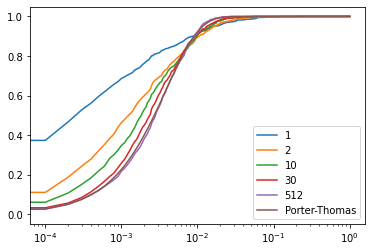

In [5]:
for D in p_x:
    plt.plot(step, cdf[D], label=str(D))
plt.plot(step, pt_cdf, label="Porter-Thomas")
plt.xscale("log")
plt.legend()